In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
figure_path = "your_path_here"  # Replace with your actual path
sim_file_10 = np.load(file="gp_mini_sim.npy")
sim_file_20 = np.load(file="gp_20_sim.npy")

fcnn_sim_file_10 = np.load(file="fcnn_mini_sim.npy")
fcnn_sim_file_20 = np.load(file="fcnn_sim_20.npy")

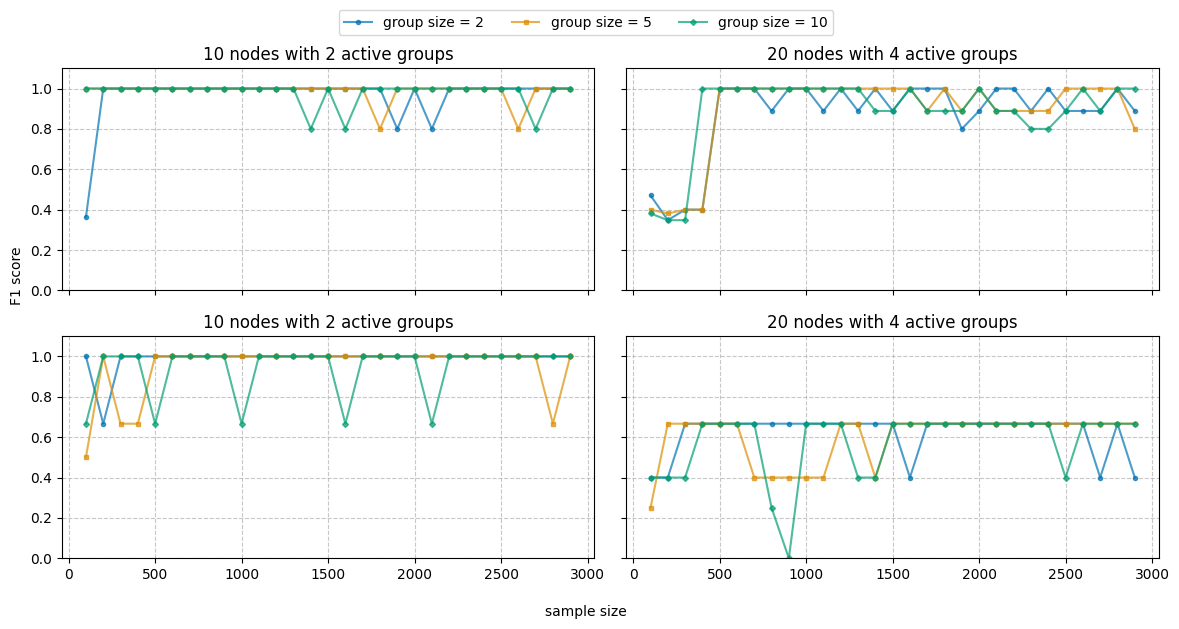

In [3]:
sim_files = [sim_file_10, sim_file_20, fcnn_sim_file_10, fcnn_sim_file_20]
setting_list = [(10, 2), (20, 4), (10, 2), (20, 4)]
group_sizes = [2, 5, 10]
markers = ["o", "s", "D"]
palette = sns.color_palette("colorblind", n_colors=3)

# Create a figure with 2 rows and 2 columns.
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=True)

# Loop over each array and plot in its corresponding subplot.
for idx, sim_file in enumerate(sim_files):
    ax = axes[idx // 2, idx % 2]  # determine subplot position
    for j in range(sim_file.shape[1] - 1):
        ax.plot(
            sim_file[:, 0],  # x-axis: sample size
            sim_file[:, j + 1],  # y-axis: corresponding F1 score
            marker=markers[j],
            markersize=3,
            linestyle="-",
            color=palette[j],
            label=f"group size = {group_sizes[j]}",
            alpha=0.7,
        )
    # ax.set_xlabel("sample size", fontsize=12)
    # ax.set_ylabel("F1 score", fontsize=12)
    ax.set_title(f"{setting_list[idx][0]} nodes with {setting_list[idx][1]} active groups")
    ax.set_ylim([0, 1.1])  # Fix y-axis to [0,1]
    ax.grid(True, linestyle="--", alpha=0.7)
    ax.tick_params(axis="both", labelsize=10)
    # ax.legend(fontsize=12)
# Set common x and y labels for the entire figure.
fig.supxlabel("sample size", fontsize=10)
fig.supylabel("F1 score", fontsize=10)

# Retrieve legend handles and labels from one of the subplots.
handles, labels = axes[0, 0].get_legend_handles_labels()

fig.tight_layout(rect=[0, 0, 1, 0.85])

# Place a common legend above the subplots.
fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=10, bbox_to_anchor=(0.5, 0.89))

# plt.savefig(figure_path + "murgs_sim.png") # Uncomment to save the figure
plt.show()